In [70]:
import numpy as np
import pandas as pd

train = pd.read_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\train_s3TEQDk.csv")
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN,test
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN,test
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN,test
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,NaN,test


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.1+ MB


In [72]:
train.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [73]:
# Drop null value from Credit_Product column because it has a lot of null values
# will not drop this time

In [74]:
#train_new1 = train.dropna()
#train_new1.head(10)
train_new1 = train

In [75]:
from sklearn.preprocessing import LabelEncoder
Gender_new = pd.get_dummies(train_new1['Gender'],)
Occupation_new = pd.get_dummies(train_new1['Occupation'])
Channel_Code_new = pd.get_dummies(train_new1['Channel_Code'])
Credit_Product_new = pd.get_dummies(train_new1['Credit_Product'])
train_new1["Region_Code"] = train_new1["Region_Code"].astype('category')
Region_Code_new = train_new1["Region_Code"].cat.codes

train_new = pd.concat([train_new1.iloc[ :, [0,2,6,8,9,10,11]], Gender_new, Region_Code_new, Credit_Product_new, Occupation_new, Channel_Code_new],axis=1)
train_new

,ID,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,source,Female,Male,0,No,Yes,Entrepreneur,Other,Salaried,Self_Employed,X1,X2,X3,X4
0,NNVBBKZB,73,43,1045696,No,0.0,train,1,0,18,1,0,0,1,0,0,0,0,1,0
1,IDD62UNG,30,32,581988,No,0.0,train,1,0,27,1,0,0,0,1,0,1,0,0,0
2,HD3DSEMC,56,26,1484315,Yes,0.0,train,1,0,18,1,0,0,0,0,1,0,0,1,0
3,BF3NC7KV,34,19,470454,No,0.0,train,0,1,20,1,0,0,0,1,0,1,0,0,0
4,TEASRWXV,30,33,886787,No,0.0,train,1,0,32,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,52,86,4242558,Yes,NaN,test,0,1,18,0,1,0,0,1,0,0,1,0,0
351033,CWQ72DWS,55,86,1159153,No,NaN,test,0,1,27,0,1,0,1,0,0,0,1,0,0
351034,HDESC8GU,35,15,1703727,No,NaN,test,0,1,4,1,0,0,0,1,0,0,0,0,1
351035,2PW4SFCA,53,93,737178,Yes,NaN,test,0,1,4,1,0,0,1,0,0,0,0,1,0


In [76]:
train_new = train_new.rename(columns={'Female': 'Is_Female', 0:'Region_EnCode', 'No':'Credit_Product_Is_No', 'Yes':'Credit_Product_Is_Yes', 'X1':'Is_X1', 'X2':'Is_X2', 'X3':'Is_X3'})
Is_Active_new = pd.get_dummies(train_new['Is_Active'])
New_train = pd.concat([train_new.iloc[ : ], Is_Active_new],axis=1)
New_train = New_train.rename(columns={'Yes': 'Is_Active_Yes'})
New_train

,ID,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,source,Is_Female,Male,Region_EnCode,...,Entrepreneur,Other,Salaried,Self_Employed,Is_X1,Is_X2,Is_X3,X4,No,Is_Active_Yes
0,NNVBBKZB,73,43,1045696,No,0.0,train,1,0,18,...,0,1,0,0,0,0,1,0,1,0
1,IDD62UNG,30,32,581988,No,0.0,train,1,0,27,...,0,0,1,0,1,0,0,0,1,0
2,HD3DSEMC,56,26,1484315,Yes,0.0,train,1,0,18,...,0,0,0,1,0,0,1,0,0,1
3,BF3NC7KV,34,19,470454,No,0.0,train,0,1,20,...,0,0,1,0,1,0,0,0,1,0
4,TEASRWXV,30,33,886787,No,0.0,train,1,0,32,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,52,86,4242558,Yes,NaN,test,0,1,18,...,0,0,1,0,0,1,0,0,0,1
351033,CWQ72DWS,55,86,1159153,No,NaN,test,0,1,27,...,0,1,0,0,0,1,0,0,1,0
351034,HDESC8GU,35,15,1703727,No,NaN,test,0,1,4,...,0,0,1,0,0,0,0,1,1,0
351035,2PW4SFCA,53,93,737178,Yes,NaN,test,0,1,4,...,0,1,0,0,0,0,1,0,0,1


In [77]:
train_new2 = New_train.loc[ New_train.source == "train", ['Age','Vintage','Avg_Account_Balance','Is_Female','Region_EnCode','Credit_Product_Is_No','Credit_Product_Is_Yes','Entrepreneur','Salaried','Self_Employed','Is_X1','Is_X2','Is_X3','Is_Active_Yes','Is_Lead']]
new_data = New_train.loc[ New_train.source == "test", ['ID','Age','Vintage','Avg_Account_Balance','Is_Female','Region_EnCode','Credit_Product_Is_No','Credit_Product_Is_Yes','Entrepreneur','Salaried','Self_Employed','Is_X1','Is_X2','Is_X3','Is_Active_Yes']]
train_new2.to_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\New_Train.csv",index=False)
new_data

,ID,Age,Vintage,Avg_Account_Balance,Is_Female,Region_EnCode,Credit_Product_Is_No,Credit_Product_Is_Yes,Entrepreneur,Salaried,Self_Employed,Is_X1,Is_X2,Is_X3,Is_Active_Yes
245725,VBENBARO,29,25,742366,0,4,0,1,0,0,0,1,0,0,0
245726,CCMEWNKY,43,49,925537,0,18,0,0,0,0,0,0,1,0,0
245727,VK3KGA9M,31,14,215949,0,20,1,0,0,1,0,1,0,0,0
245728,TT8RPZVC,29,33,868070,0,22,1,0,0,0,0,1,0,0,0
245729,SHQZEYTZ,29,19,657087,1,20,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,52,86,4242558,0,18,0,1,0,1,0,0,1,0,1
351033,CWQ72DWS,55,86,1159153,0,27,0,1,0,0,0,0,1,0,0
351034,HDESC8GU,35,15,1703727,0,4,1,0,0,1,0,0,0,0,0
351035,2PW4SFCA,53,93,737178,0,4,1,0,0,0,0,0,0,1,1


# Splitting Dataset in train & Test

In [78]:
from sklearn.model_selection import train_test_split
train_data = train_new2

#train_data = pd.read_csv("C:\\Users\\ani12\\Downloads\\New_Train.csv")

#y = train_data['Is_Lead']
y = train_data['Is_Lead'].astype('category')
#xs = train_new.loc[ : , train_new.columns != ('ID' and 'Is_Lead')]
x = train_data.iloc[ :, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0,stratify=y)
print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)
#y_train.dtypes

Training split input-  (196580, 14)
Testing split input-  (49145, 14)


In [79]:
x_train['Age'] = (x_train['Age'] - min(x_train['Age']))/(max(x_train['Age'])-min(x_train['Age']))
x_train['Avg_Account_Balance'] = (x_train['Avg_Account_Balance'] - min(x_train['Avg_Account_Balance']))/(max(x_train['Avg_Account_Balance'])-min(x_train['Avg_Account_Balance']))
x_train['Vintage'] = (x_train['Vintage'] - min(x_train['Vintage']))/(max(x_train['Vintage'])-min(x_train['Vintage']))
x_train['Region_EnCode'] = (x_train['Region_EnCode'] - min(x_train['Region_EnCode']))/(max(x_train['Region_EnCode'])-min(x_train['Region_EnCode']))

x_test['Age'] = (x_test['Age'] - min(x_test['Age']))/(max(x_test['Age'])-min(x_test['Age']))
x_test['Avg_Account_Balance'] = (x_test['Avg_Account_Balance'] - min(x_test['Avg_Account_Balance']))/(max(x_test['Avg_Account_Balance'])-min(x_test['Avg_Account_Balance']))
x_test['Vintage'] = (x_test['Vintage'] - min(x_test['Vintage']))/(max(x_test['Vintage'])-min(x_test['Vintage']))
x_test['Region_EnCode'] = (x_test['Region_EnCode'] - min(x_test['Region_EnCode']))/(max(x_test['Region_EnCode'])-min(x_test['Region_EnCode']))


<ipython-input-79-4592245f8cf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Age'] = (x_train['Age'] - min(x_train['Age']))/(max(x_train['Age'])-min(x_train['Age']))
<ipython-input-79-4592245f8cf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Avg_Account_Balance'] = (x_train['Avg_Account_Balance'] - min(x_train['Avg_Account_Balance']))/(max(x_train['Avg_Account_Balance'])-min(x_train['Avg_Account_Balance']))
<ipython-input-79-4592245f8cf0>:3: SettingWithCopyWarning: 
A value is try

# Using Logistic Regression Model

In [81]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Defining the Logistic Regression algorithm
#log_regression = LogisticRegression()
#log_regression.fit(x_train,y_train)
#print('Logistic Regression model Created')


from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.001,normalize=False)
ridgereg.fit(x_train,y_train)
print('Ridge Logistic Regression model Created')


Ridge Logistic Regression model Created


In [82]:
# Predicting the values of test data

y_pred = ridgereg.predict(x_test)
y_pred
#print("Classification report - \n", classification_report(y_test,y_pred))


# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
#dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

#accuracy_score(y_test, y_pred)

#Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

array([-0.04869088,  0.97350314,  0.80843126, ...,  0.18936528,
        0.41843366,  0.22549764])

In [83]:
#Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [20]:
#get features Importances
xx= pd.Series(random_classifier.feature_importances_,index=x.columns)
xx.sort_values(ascending=False)

NameError: name 'random_classifier' is not defined

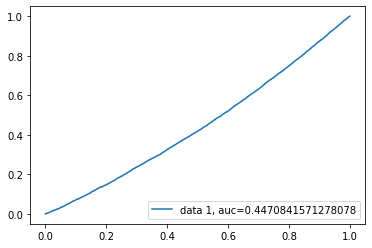

In [22]:
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [86]:
new_data['Age'] = (new_data['Age'] - min(new_data['Age']))/(max(new_data['Age'])-min(new_data['Age']))
new_data['Avg_Account_Balance'] = (new_data['Avg_Account_Balance'] - min(new_data['Avg_Account_Balance']))/(max(new_data['Avg_Account_Balance'])-min(new_data['Avg_Account_Balance']))
new_data['Vintage'] = (new_data['Vintage'] - min(new_data['Vintage']))/(max(new_data['Vintage'])-min(new_data['Vintage']))
new_data['Region_EnCode'] = (new_data['Region_EnCode'] - min(new_data['Region_EnCode']))/(max(new_data['Region_EnCode'])-min(new_data['Region_EnCode']))

new_data['Is_Lead'] = ridgereg.predict(new_data.iloc[:,1:15])

new_data['Is_Lead']

245725    0.184348
245726    0.810305
245727    0.041642
245728   -0.018175
245729   -0.040854
            ...   
351032    0.474331
351033    0.367877
351034    0.111252
351035    0.177916
351036    0.045112
Name: Is_Lead, Length: 105312, dtype: float64

In [87]:
Result = new_data.loc[:,['ID','Is_Lead']]
Result

,ID,Is_Lead
245725,VBENBARO,0.184348
245726,CCMEWNKY,0.810305
245727,VK3KGA9M,0.041642
245728,TT8RPZVC,-0.018175
245729,SHQZEYTZ,-0.040854
...,...,...
351032,DBENJOYI,0.474331
351033,CWQ72DWS,0.367877
351034,HDESC8GU,0.111252
351035,2PW4SFCA,0.177916


In [88]:
Result.to_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\Result_ridgeReg.csv",index=False)